In [1]:
#importing potentially useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import warnings #to remove warnings while working with the data
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing and loading dataset
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
gt = pd.read_csv('globalterrorism.csv')
gt.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

#### Data Exploration

In [3]:
gt.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
gt.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [5]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


Not helpful for decision-making or datatype of relevant columns

In [6]:
#get a fuller view of the column names
list(gt.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [7]:
gt.shape

(181691, 135)

In [8]:
gt.nunique()

eventid               181691
iyear                     47
imonth                    13
iday                      32
approxdate              2244
extended                   2
resolution              1859
country                  205
country_txt              205
region                    12
region_txt                12
provstate               2854
city                   36674
latitude               48322
longitude              48039
specificity                5
vicinity                   3
location               44109
summary               112492
crit1                      2
crit2                      2
crit3                      2
doubtterr                  3
alternative                5
alternative_txt            5
multiple                   2
success                    2
suicide                    2
attacktype1                9
attacktype1_txt            9
attacktype2                9
attacktype2_txt            9
attacktype3                8
attacktype3_txt            8
targtype1     

The data cuts across terrorism in 205 countries for 47 years, starting from 1970.

In [9]:
#creating new dataset with selected columns based on column description from kaggle and intended problem statement
gt1 = gt[['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt', 'city', 'success', 'suicide', 
        'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'target1', 'natlty1_txt', 'gname', 'motive', 
        'nperps', 'weaptype1_txt', 'weapsubtype1_txt', 'nkill', 'nwound', 'property']]
gt1.head(10)

,iyear,imonth,iday,extended,country_txt,region_txt,city,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,natlty1_txt,gname,motive,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nwound,property
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Dominican Republic,MANO-D,NaN,NaN,Unknown,NaN,1.0,0.0,0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Belgium,23rd of September Communist League,NaN,7.0,Unknown,NaN,0.0,0.0,0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,United States,Unknown,NaN,NaN,Unknown,NaN,1.0,0.0,0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,United States,Unknown,NaN,NaN,Explosives,Unknown Explosive Type,NaN,NaN,1
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,United States,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN,1
5,1970,1,1,0,United States,North America,Cairo,1,0,Armed Assault,Police,"Police Building (headquarters, station, school)",Cairo Police Headquarters,United States,Black Nationalists,To protest the Cairo Illinois Police Deparment,-99.0,Firearms,Unknown Gun Type,0.0,0.0,1
6,1970,1,2,0,Uruguay,South America,Montevideo,0,0,Assassination,Police,Police Security Forces/Officers,Juan Maria de Lucah/Chief of Directorate of in...,Uruguay,Tupamaros (Uruguay),NaN,3.0,Firearms,Automatic or Semi-Automatic Rifle,0.0,0.0,0
7,1970,1,2,0,United States,North America,Oakland,1,0,Bombing/Explosion,Utilities,Electricity,Edes Substation,United States,Unknown,NaN,-99.0,Explosives,Unknown Explosive Type,0.0,0.0,1
8,1970,1,2,0,United States,North America,Madison,1,0,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,"R.O.T.C. offices at University of Wisconsin, M...",United States,New Year's Gang,To protest the War in Vietnam and the draft,1.0,Incendiary,Molotov Cocktail/Petrol Bomb,0.0,0.0,1
9,1970,1,3,0,United States,North America,Madison,1,0,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,Selective Service Headquarters in Madison Wisc...,United States,New Year's Gang,To protest the War in Vietnam and the draft,1.0,Incendiary,Gasoline or Alcohol,0.0,0.0,1


In [10]:
#understanding the new dataset
gt1.shape

(181691, 22)

In [11]:
#insights into missing values
gt1.isnull().sum()

iyear                    0
imonth                   0
iday                     0
extended                 0
country_txt              0
region_txt               0
city                   434
success                  0
suicide                  0
attacktype1_txt          0
targtype1_txt            0
targsubtype1_txt     10373
target1                636
natlty1_txt           1559
gname                    0
motive              131130
nperps               71115
weaptype1_txt            0
weapsubtype1_txt     20768
nkill                10313
nwound               16311
property                 0
dtype: int64

In [12]:
#null values in percentage per column
gt1.isnull().mean() * 100

iyear                0.000000
imonth               0.000000
iday                 0.000000
extended             0.000000
country_txt          0.000000
region_txt           0.000000
city                 0.238867
success              0.000000
suicide              0.000000
attacktype1_txt      0.000000
targtype1_txt        0.000000
targsubtype1_txt     5.709144
target1              0.350045
natlty1_txt          0.858050
gname                0.000000
motive              72.171984
nperps              39.140629
weaptype1_txt        0.000000
weapsubtype1_txt    11.430396
nkill                5.676120
nwound               8.977330
property             0.000000
dtype: float64

In [13]:
#dropping columns with null value percent > 10
gt1 = gt1.drop(['motive', 'nperps', 'weapsubtype1_txt'], axis=1)
gt1.shape

(181691, 19)

In [14]:
#renaming columns for easy access
gt1.columns = ['Year', 'Month', 'Day', 'Extended', 'Country', 
                   'Region', 'City', 'Success', 'Suicide', 'Attack_Type', 
                   'Target_Type', 'Target_Subtype', 'Target', 'Target_Nationality', 
                   'Attack_Group', 'Weapon', 'No_Of_Killed', 'No_Of_Wounded', 'Property']

In [15]:
#checking datatypes
gt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                181691 non-null  int64  
 1   Month               181691 non-null  int64  
 2   Day                 181691 non-null  int64  
 3   Extended            181691 non-null  int64  
 4   Country             181691 non-null  object 
 5   Region              181691 non-null  object 
 6   City                181257 non-null  object 
 7   Success             181691 non-null  int64  
 8   Suicide             181691 non-null  int64  
 9   Attack_Type         181691 non-null  object 
 10  Target_Type         181691 non-null  object 
 11  Target_Subtype      171318 non-null  object 
 12  Target              181055 non-null  object 
 13  Target_Nationality  180132 non-null  object 
 14  Attack_Group        181691 non-null  object 
 15  Weapon              181691 non-nul

Most columns appear to have the right format. Columns: success, suicide, and extended should be logicals (boolean). Then, dates should have the right formats.

In [16]:
#Check Missing Values
def check_missing(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(20)

check_missing(gt1)

,Total,Percent
No_Of_Wounded,16311,0.089773
Target_Subtype,10373,0.057091
No_Of_Killed,10313,0.056761
Target_Nationality,1559,0.008581
Target,636,0.003500
City,434,0.002389
Year,0,0.000000
Target_Type,0,0.000000
Weapon,0,0.000000
Attack_Group,0,0.000000


In [17]:
#filling missing values
gt1["Target"].fillna("Unknown", inplace = True)
gt1["Target_Subtype"].fillna("Unknown", inplace = True)
gt1["City"].fillna("Unknown", inplace = True) 
gt1["No_Of_Killed"].fillna(0, inplace = True)
gt1["Target_Nationality"].fillna("Unknown", inplace=True)
gt1["No_Of_Wounded"].fillna(0, inplace=True)

In [18]:
gt1.isnull().sum()

Year                  0
Month                 0
Day                   0
Extended              0
Country               0
Region                0
City                  0
Success               0
Suicide               0
Attack_Type           0
Target_Type           0
Target_Subtype        0
Target                0
Target_Nationality    0
Attack_Group          0
Weapon                0
No_Of_Killed          0
No_Of_Wounded         0
Property              0
dtype: int64

In [19]:
#saving cleaned data to a new csv file
#gt1.to_csv('CleanedGlobalTerrorism.csv', index=False)

In [20]:
def check_duplicate(data):
    duplicate = data.duplicated()
    unique_data  = pd.Series(data.shape[0] - duplicate.value_counts()[1])
    duplicate_data = pd.Series(data.shape[0] - duplicate.value_counts()[0])
    unique_data_percent = pd.Series((unique_data/data.shape[0])*100)
    duplicate_data_percent = pd.Series((duplicate_data/data.shape[0])*100)
    dublicate = pd.concat([unique_data, duplicate_data,unique_data_percent,duplicate_data_percent], axis=1, keys=['Unique Count', 'Duplicate Count','Unique percent','Duplicate Percent'])
    return dublicate

check_duplicate(gt1)

,Unique Count,Duplicate Count,Unique percent,Duplicate Percent
0,170881,10810,94.050338,5.949662


In [21]:
# not behaving as expected, so nope...
#gt1 = gt1.drop_duplicates(inplace=True)

In [22]:
gt1.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack_Type,Target_Type,Target_Subtype,Target,Target_Nationality,Attack_Group,Weapon,No_Of_Killed,No_Of_Wounded,Property
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Dominican Republic,MANO-D,Unknown,1.0,0.0,0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Belgium,23rd of September Communist League,Unknown,0.0,0.0,0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,United States,Unknown,Unknown,1.0,0.0,0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,United States,Unknown,Explosives,0.0,0.0,1
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,United States,Unknown,Incendiary,0.0,0.0,1


#### Visualizations

Text(0.5, 1.0, 'Number Of Terrorist Activities Each Year')

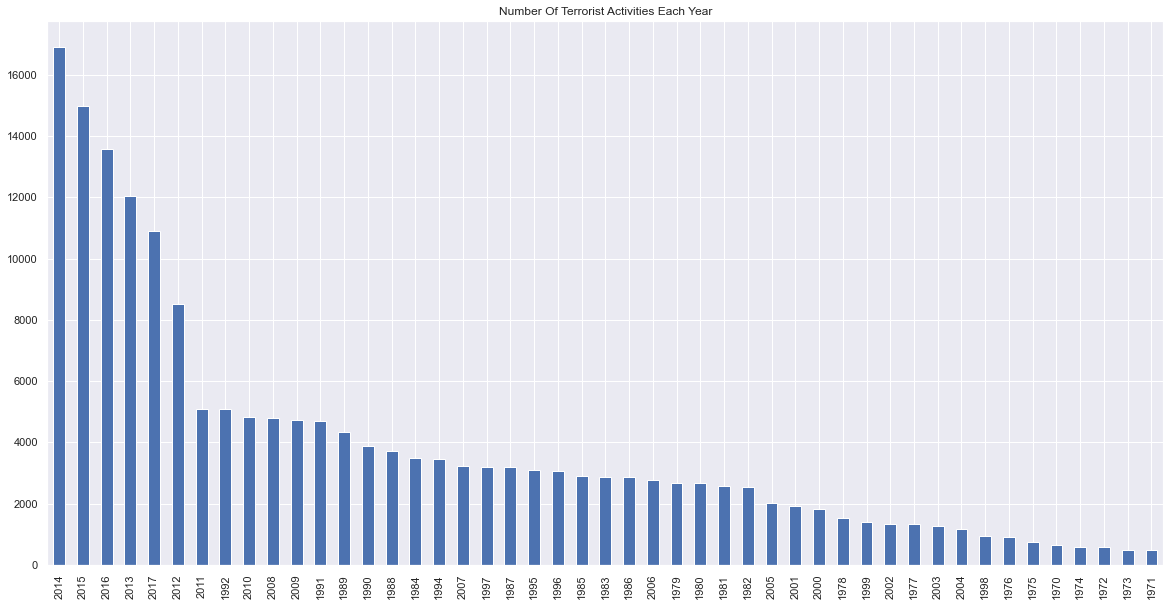

In [23]:
gt1['Year'].value_counts().plot(kind='bar',figsize=[20,10])
plt.title('Number Of Terrorist Activities Each Year')

Text(0.5, 1.0, 'Number Of Terrorist Activities per Region')

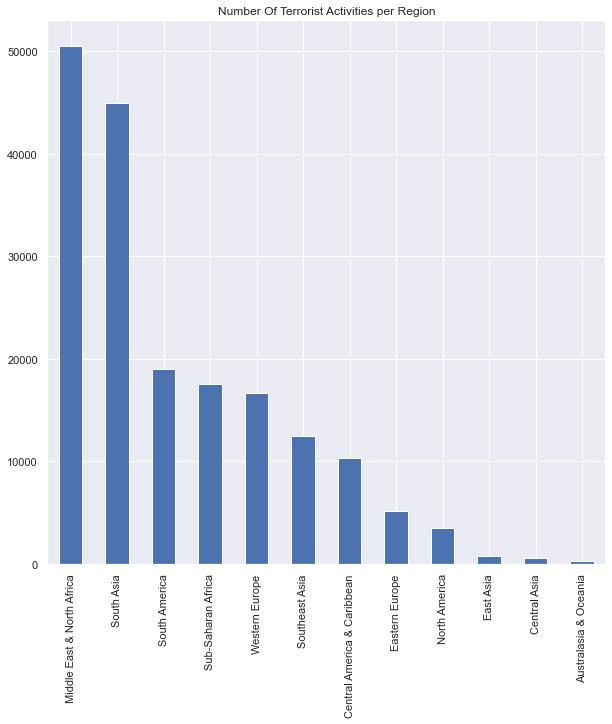

In [24]:
gt1['Region'].value_counts().plot(kind='bar',figsize=[10,10])
plt.title('Number Of Terrorist Activities per Region')

Text(0.5, 1.0, 'Number Of Terrorist Activities by Attack Type')

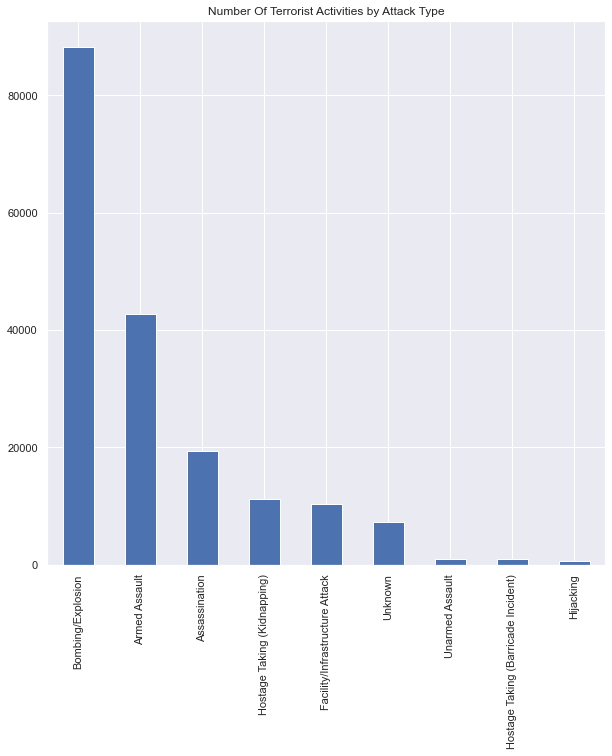

In [25]:
gt1['Attack_Type'].value_counts().plot(kind='bar',figsize=[10,10])
plt.title('Number Of Terrorist Activities by Attack Type')

Text(0.5, 1.0, 'Favorite Attack Methods')

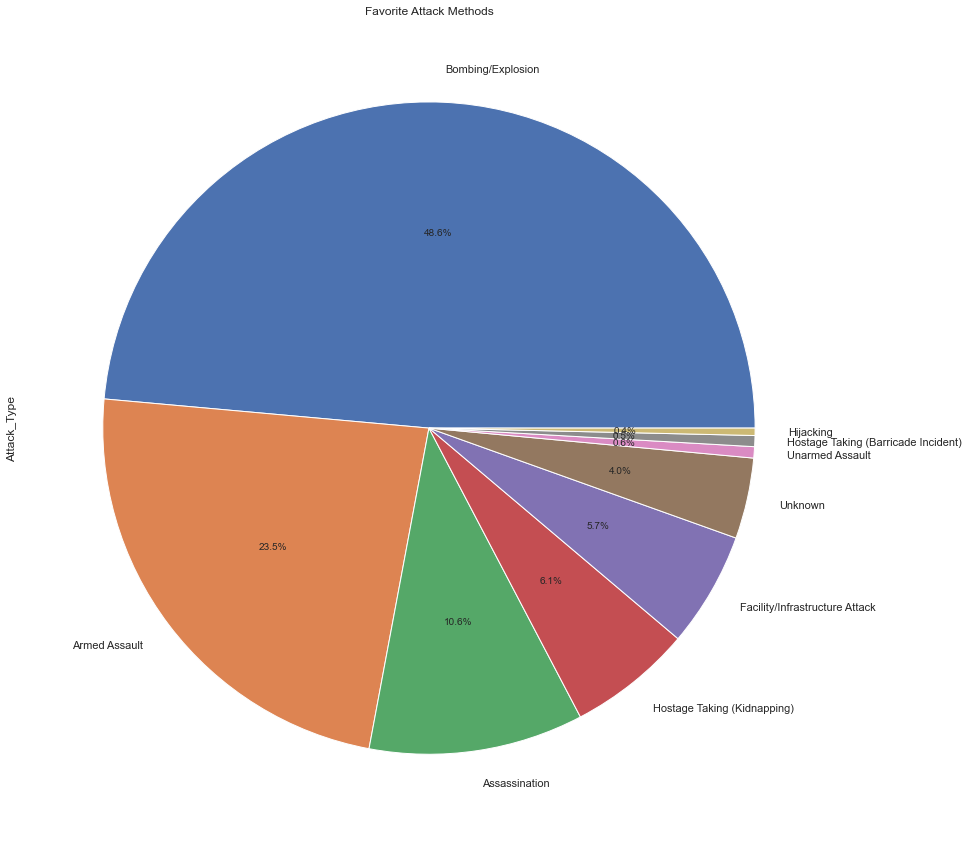

In [26]:
gt1['Attack_Type'].value_counts().plot(kind='pie',figsize=[20,15],autopct='%1.1f%%') 
plt.title("Favorite Attack Methods")

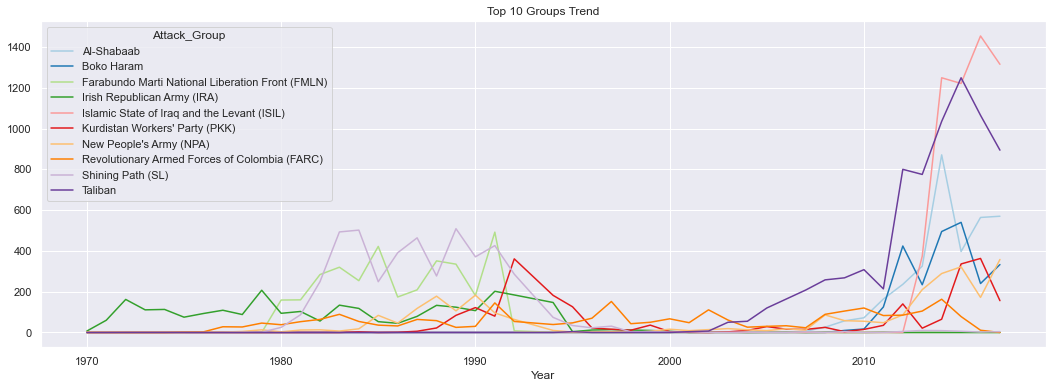

In [30]:
top_groups10 = gt1[gt1['Attack_Group'].isin(gt1['Attack_Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Attack_Group).plot(color=sns.color_palette('Paired',15))
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.title('Top 10 Groups Trend')
plt.show()

In [28]:
#changing datatype from int to boolean
#column_names = ['success', 'suicide', 'extended']
#gt1[column_names] = gt1[column_names].astype(bool)

0    175058
1      6633
Name: Suicide, dtype: int64


Text(0.5, 1.0, 'Suicide terrorist operations')

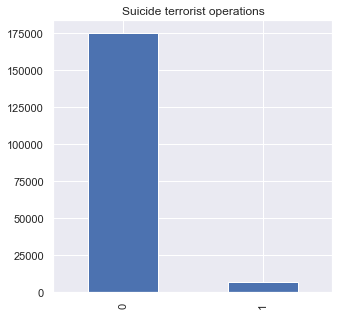

In [31]:
gt1['Suicide'].value_counts().plot(kind='bar', figsize=[5,5])
print(gt1['Suicide'].value_counts())
plt.title('Suicide terrorist operations')

1    161632
0     20059
Name: Success, dtype: int64


Text(0.5, 1.0, 'Success terrorist operations')

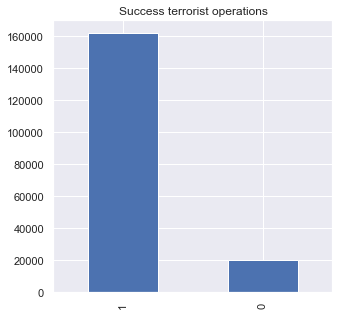

In [32]:
gt1['Success'].value_counts().plot(kind='bar', figsize=[5,5])
print(gt1['Success'].value_counts())
plt.title('Success terrorist operations')

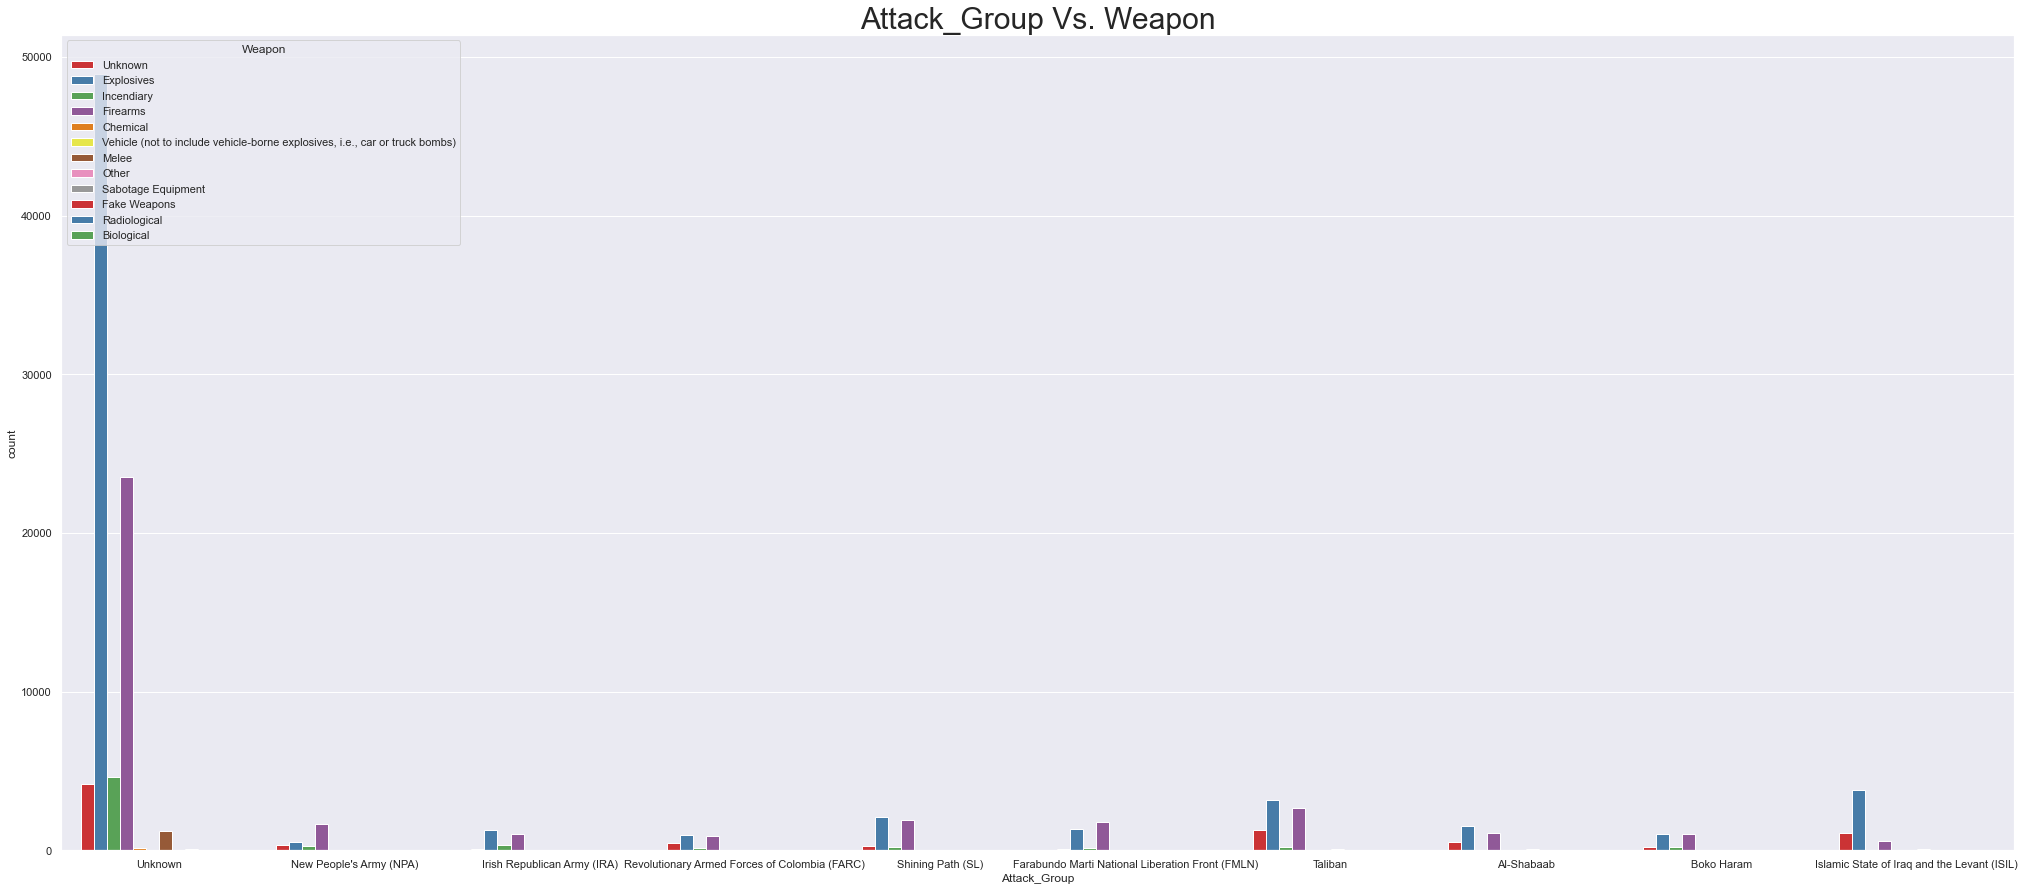

In [33]:
plt.subplots(figsize = (35,15))
Top_10_Group = gt1['Attack_Group'].value_counts().index.tolist()[0:10]
snap = gt1[['Attack_Group','Weapon']]
AttackG_Weapon = snap[snap['Attack_Group'].isin(Top_10_Group)]
sns.countplot(x='Attack_Group', hue ='Weapon', data = AttackG_Weapon,palette = "Set1")
plt.title('Attack_Group Vs. Weapon', fontsize = 30)
plt.show()

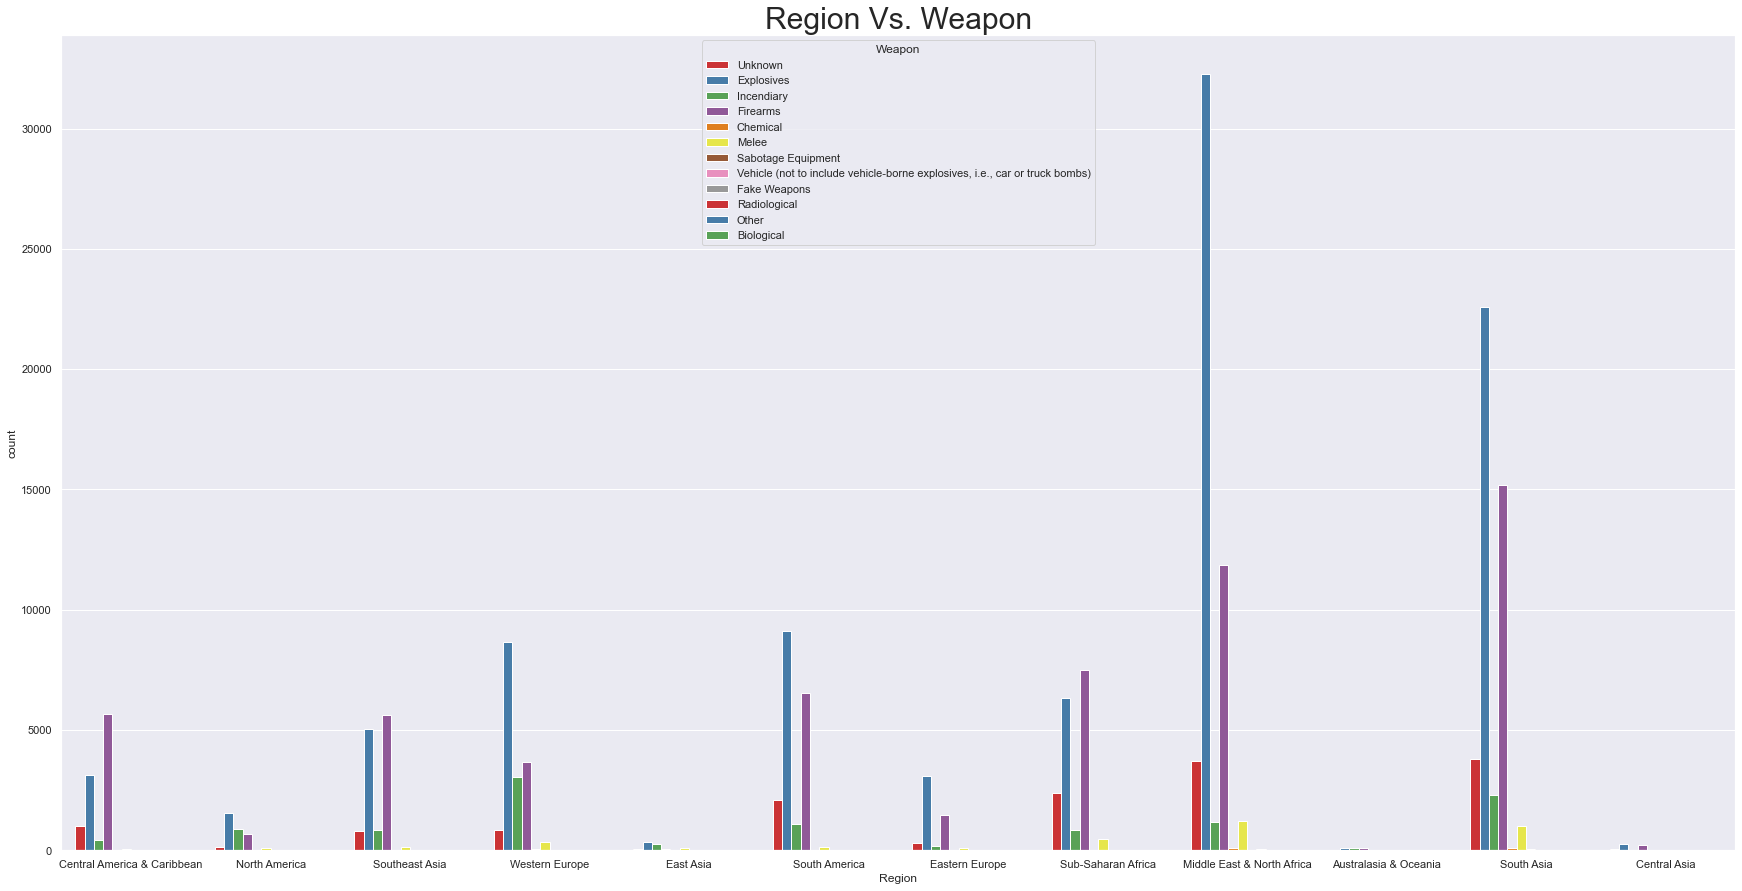

In [34]:
plt.subplots(figsize = (30,15))
sns.countplot(x="Region", hue ='Weapon', data = gt1,palette = "Set1")
plt.title('Region Vs. Weapon', fontsize = 30)
plt.show()

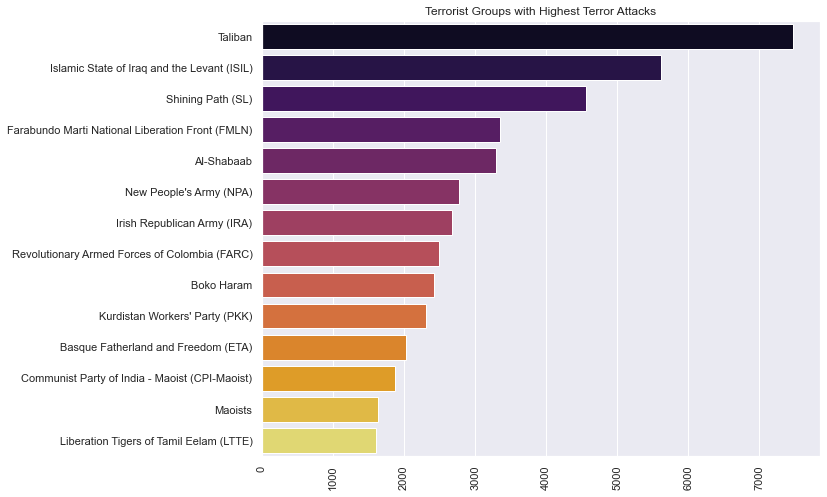

In [36]:
sns.barplot(gt1['Attack_Group'].value_counts()[1:15].values,gt1['Attack_Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

Text(0.5, 1.0, 'Number Of Terrorist Activities in Top 10 Countries')

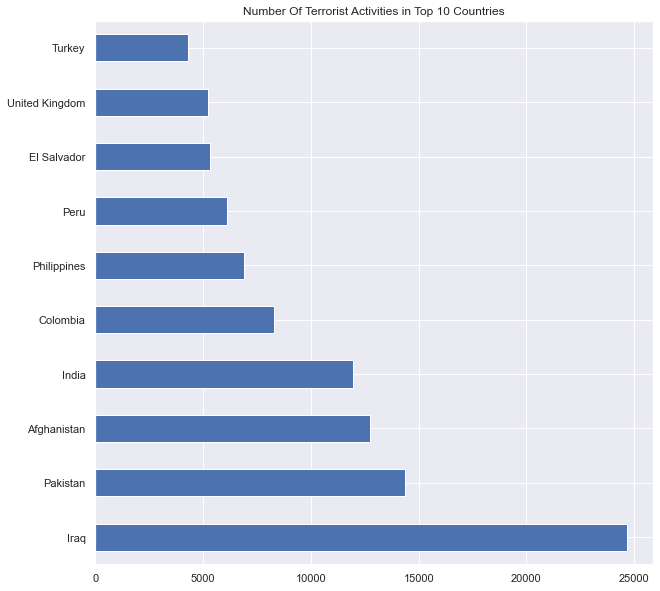

In [37]:
gt1['Country'].value_counts().head(10).plot(kind='barh',figsize=[10,10])
plt.title('Number Of Terrorist Activities in Top 10 Countries')

<AxesSubplot:ylabel='Weapon'>

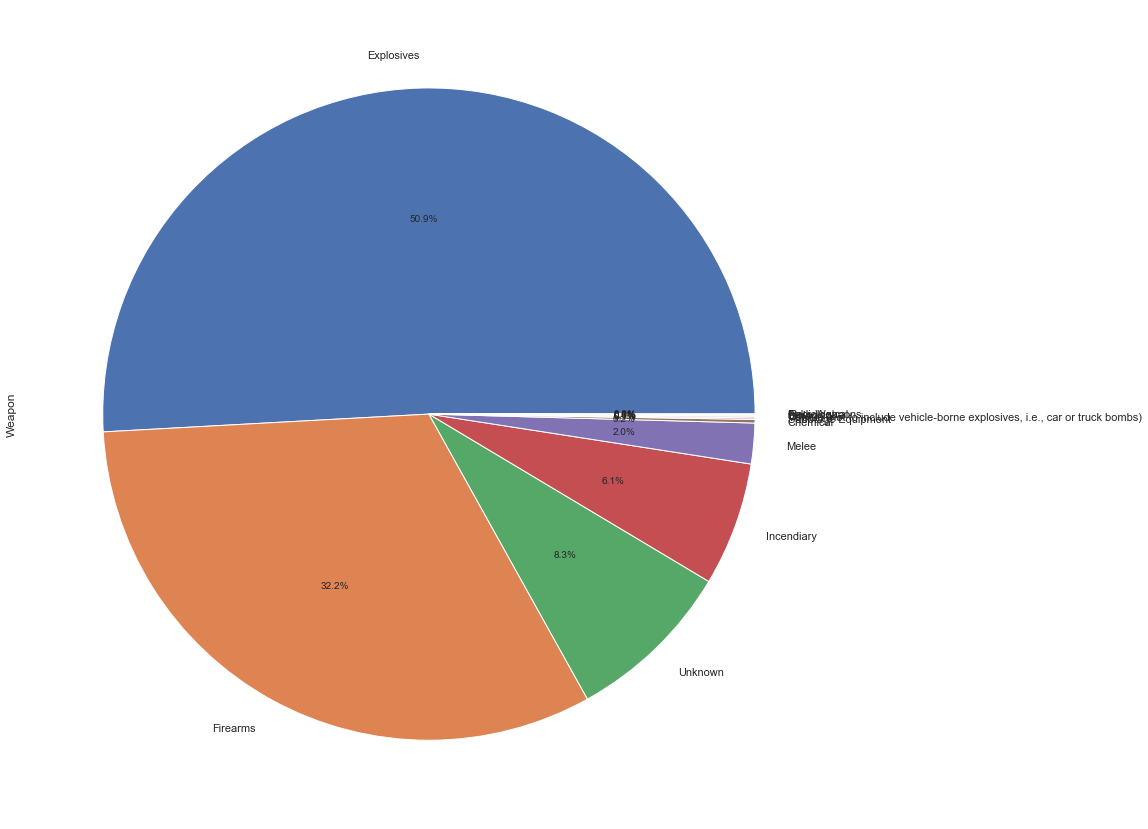

In [38]:
gt1['Weapon'].value_counts().plot(kind='pie',figsize=[20,15],autopct='%1.1f%%')